# Erdös Institute
## Data Science Boot Camp Project: Police Interaction
--- 

In [1]:
import pandas as pd
df = pd.read_csv('/Users/patrickma1994/Documents/data.tsv', sep='\t',dtype='str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130122 entries, 0 to 130121
Columns: 277 entries, SCRMCTRL to V353
dtypes: object(277)
memory usage: 275.0+ MB


In [2]:
# Checking if the value satisfy the codebook
print(df['V347'].value_counts())
list(df.columns)

V347
9     112008
1      16628
2        903
3        529
8         40
98        14
Name: count, dtype: int64


['SCRMCTRL',
 'PPCSWGT',
 'SEQNUM',
 'SEX',
 'AGE',
 'INTTYPE',
 'NONINT',
 'HISP',
 'MODE',
 'PSSTRATA',
 'SECUCODE',
 'INCOME',
 'V10A',
 'V10B',
 'V10C',
 'V10D',
 'V10E',
 'V10F',
 'V10G',
 'V10H',
 'V10I',
 'V10J',
 'V10K',
 'V10L',
 'V10M',
 'V10N',
 'V22A',
 'V22B',
 'V22C',
 'V22D',
 'V22E',
 'V22F',
 'V22G',
 'V22H',
 'V22I',
 'V22J',
 'V22K',
 'V22L',
 'V22M',
 'V22N',
 'V22O',
 'V22P',
 'V23A',
 'V23B',
 'V23C',
 'V23D',
 'V23E',
 'V23F',
 'V23G',
 'V23H',
 'V23I',
 'V23J',
 'V23K',
 'V23L',
 'V23M',
 'V23N',
 'V23O',
 'V23P',
 'V23Q',
 'V23R',
 'V23S',
 'V1',
 'V23T',
 'V23U',
 'V23V',
 'V23W',
 'V23X',
 'V23Y',
 'V23Z',
 'V24A',
 'V24B',
 'V24C',
 'V24J',
 'V24D',
 'V24E',
 'V24F',
 'V24G',
 'V24H',
 'V24I',
 'CHECK_ITEM_B',
 'CHECK_ITEM_B1A',
 'CHECK_ITEM_B1B',
 'CHECK_ITEM_B1C',
 'CHECK_ITEM_B1D',
 'CHECK_ITEM_B1E',
 'CHECK_ITEM_B1F',
 'CHECK_ITEM_B1G',
 'CHECK_ITEM_B1H',
 'CHECK_ITEM_B1I',
 'CHECK_ITEM_B1J',
 'CHECK_ITEM_B1K',
 'V32',
 'CHECK_ITEM_B2A',
 'CHECK_ITEM_B2B

By checking the codebook and 

In [3]:
df_m = df[['AGE', 'HISP', 'SEX', 'INCOME', 'V347']].rename(columns={'V347': 'proper_behave'})
df_m.head()

,AGE,HISP,SEX,INCOME,proper_behave
0,3,3,2,3,9
1,3,3,1,3,9
2,3,1,2,4,9
3,3,1,1,4,9
4,4,1,2,3,9


In [ ]:
# Convert columns to categorical
df_m['AGE'] = pd.Categorical(df_m['AGE'])
df_m['HISP'] = pd.Categorical(df_m['HISP'])
df_m['SEX'] = pd.Categorical(df_m['SEX'])
df_m['INCOME'] = pd.Categorical(df_m['INCOME'])

# Filter rows where proper_behave is 1 or 2
df_m = df_m[df_m['proper_behave'].isin(['1', '2'])]

# Remap proper_behave values
df_m['proper_behave'] = df_m['proper_behave'].map({'1': 1, '2': 0})

# Convert proper_behave to numeric and checking the column number
df_m['proper_behave'] = pd.to_numeric(df_m['proper_behave'])
df_m.shape 
#df_m.head()
# Check missing values in all columns
print("Missing values in each column:")
print(df_m.isnull().sum())
# Seems to be no missing values to the current dataset

Missing values in each column:
AGE              0
HISP             0
SEX              0
INCOME           0
proper_behave    0
dtype: int64


The following codes drops missing values, but our data doesn't have missing values for the features selected. 

In [6]:
# Drop rows with missing values in AGE, HISP, SEX, and INCOME
df_m = df_m.dropna(subset=['AGE', 'HISP', 'SEX', 'INCOME'])

# Verify the shape after dropping missing values
print("\nDataFrame shape after dropping missing values:")
print(df_m.shape)

# Verify there are no more missing values in these columns
print("\nRemaining missing values:")
print(df_m[['AGE', 'HISP', 'SEX', 'INCOME']].isnull().sum())


DataFrame shape after dropping missing values:
(17531, 5)

Remaining missing values:
AGE       0
HISP      0
SEX       0
INCOME    0
dtype: int64


### Logistic regression result
---
In the following model setup, the y(dependent variable is "proper_behave"), the dependent variable is the following:
1. HISP: surveys if the the interviewee's ethnicity
2. INCOME: surveys the interviewee's income level
3. SEX: surveys the interviewee's gender
4. AGE: surveys the interviewee's age

The data set is splitted into 80% and 20%. A confusion matrix is provided below.

Model accuracy: 0.9458226404334189


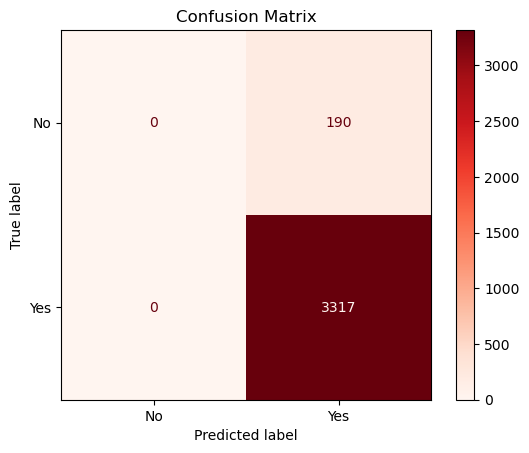


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.95      1.00      0.97      3317

    accuracy                           0.95      3507
   macro avg       0.47      0.50      0.49      3507
weighted avg       0.89      0.95      0.92      3507



/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [10]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create dummy variables for categorical predictors
X = pd.get_dummies(df_m[['AGE', 'HISP', 'SEX', 'INCOME']], drop_first=True)
y = df_m['proper_behave']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

print("Model accuracy:", model_lr.score(X_test, y_test))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Get predictions on test set
y_pred = model_lr.predict(X_test)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

# Print classification metrics
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [8]:
# Get model coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nModel coefficients:")
print(coef_df)


Model coefficients:
    Feature  Coefficient
0     AGE_2    -0.228835
1     AGE_3    -0.307666
2     AGE_4    -0.305055
3     AGE_5     0.064544
4    HISP_2    -0.760991
5    HISP_3    -0.345771
6    HISP_4     0.066357
7    HISP_5    -0.150707
8     SEX_2     0.025924
9  INCOME_4     0.309839
